<a href="https://colab.research.google.com/github/MueezAmj/A2_ML2_Bayes/blob/main/MLAssgnmnt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML2_Asst#1

In [2]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
business_data = pd.read_csv('/content/drive/My Drive/Colab/yelp_academic_dataset_business.csv', nrows=10000)
review_data = pd.read_csv('/content/drive/My Drive/Colab/yelp_academic_dataset_review.csv', nrows=10000)
user_data = pd.read_csv('/content/drive/My Drive/Colab/yelp_academic_dataset_user.csv', nrows=10000)
checkin_data = pd.read_csv('/content/drive/My Drive/Colab/yelp_academic_dataset_checkin.csv', nrows=10000)
tip_data = pd.read_csv('/content/drive/My Drive/Colab/yelp_academic_dataset_tip.csv', nrows=10000)

In [5]:
business_data.rename(columns={'stars': 'business_stars'}, inplace=True)
merged_df = pd.merge(review_data, business_data, on='business_id')
user_data.columns
user_data.rename(columns={'name': 'user_name','review_count':'user_review_count','useful':'user_useful','funny':'user_funny','cool':'user_cool'}, inplace=True)

In [6]:
merged_df = pd.merge(user_data, merged_df, on='user_id')

In [7]:
checkin_data.rename(columns={'date': 'checkin_date'}, inplace=True)

In [8]:
merged_df_with_checkin = pd.merge(merged_df, checkin_data, how='left', on='business_id')

In [9]:
tip_data.rename(columns={'date': 'tip_date','text':'tip_text'}, inplace=True)

In [10]:
unmatched_user_ids = tip_data[~tip_data['user_id'].isin(merged_df['user_id'])]
print(unmatched_user_ids[['user_id']].drop_duplicates())

final_df_with_tips = pd.merge(merged_df_with_checkin, tip_data, on=['user_id', 'business_id'], how='left')

                     user_id
0     AGNUgVwnZUey3gcPCJ76iw
1     NBN4MgHP9D3cw--SnauTkA
2     -copOvldyKh1qr-vzkDEvw
3     FjMQVZjSqY8syIO-53KFKw
4     ld0AperBXk1h6UbqmM80zw
...                      ...
9994  hJPTuggjKM9-iJQyMOY6fA
9995  hD4I8sgGcPzGasdi_nLISw
9997  nDR0BvoqgXbiv8dZ8JQy9A
9998  3IZBc4ptyGx__ZLhMgDxBQ
9999  9UZlB3fHVe2JBvPw4kRb5g

[6123 rows x 1 columns]


In [11]:
final_df_with_tips.columns

Index(['user_id', 'user_name', 'user_review_count', 'yelping_since',
       'user_useful', 'user_funny', 'user_cool', 'elite', 'friends', 'fans',
       'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos',
       'review_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text',
       'date', 'name', 'address', 'city', 'state', 'postal_code', 'latitude',
       'longitude', 'business_stars', 'review_count', 'is_open', 'attributes',
       'categories', 'hours', 'checkin_date', 'tip_text', 'tip_date',
       'compliment_count'],
      dtype='object')

In [12]:
final_df_with_tips.head()

,user_id,user_name,user_review_count,yelping_since,user_useful,user_funny,user_cool,elite,friends,fans,...,business_stars,review_count,is_open,attributes,categories,hours,checkin_date,tip_text,tip_date,compliment_count
0,2l0O1EI1m0yWjFo2zSt71w,Shiho,2837,2005-07-02 01:59:55,19237,9542,15235,"2006,2007,2008,2009,2010,2011","ZxigNlfaGmqtC1CROVu9Dg, XKAFikZAfddYv0Vg1PUkwA...",492,...,4.0,30,0,"{'GoodForKids': 'True', 'RestaurantsDelivery':...","Sandwiches, Restaurants, Burgers",NaN,NaN,NaN,NaN,NaN
1,LbPkYMGmsu4snHkY-Ri1ww,David,14,2011-03-05 05:28:00,10,3,2,NaN,"opIM6lGvGNIVL8tMDa3_Uw, 5wqafYyVJM5lKbOMIs-A3Q...",2,...,4.0,329,1,"{'Caters': 'False', 'GoodForKids': 'True', 'BY...","Fast Food, Burgers, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:0',...",NaN,NaN,NaN,NaN
2,w-zD8Ln3XZszM82AfVrspg,Robin,90,2008-05-05 02:55:07,137,36,66,2010,"RgDVC3ZUBqpEe6Y1kPhIpw, -Yuf4Ph_6DzKwDOudoRc_A...",5,...,3.0,178,0,"{'Corkage': 'False', 'RestaurantsGoodForGroups...","Tex-Mex, Restaurants, American (Traditional), ...","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...",NaN,NaN,NaN,NaN
3,ITa3vh5ERI90G_WP4SmGUQ,Peter,3193,2008-05-06 01:30:13,45810,48231,35149,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...","YPuefjfa8t8rI0Cu2D3zJQ, 8wQIoFapkegkC5fcVYg_Iw...",2388,...,4.0,381,1,"{'ByAppointmentOnly': 'False', 'WiFi': ""u'free'""}","Public Transportation, Transportation, Train S...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",NaN,NaN,NaN,NaN
4,Q5jOFJYhIsN8ouJ1rnsLQQ,Matthew,593,2006-06-21 20:03:01,1216,307,502,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2018","Txw2jX2lOtayJOiMvvTW8A, t0rFBojfJ3VHp3cJ5jiyPA...",36,...,3.5,37,1,"{'NoiseLevel': ""u'average'"", 'Ambience': ""{'to...","Diners, Restaurants, Breakfast & Brunch, Ameri...","{'Monday': '7:30-20:0', 'Tuesday': '7:30-20:0'...",NaN,NaN,NaN,NaN


In [13]:
# Check for null values in each column
null_counts = final_df_with_tips.isnull().sum()

# Display the count of null values
print(null_counts[null_counts > 0])

elite               185
address               1
attributes           10
hours                55
checkin_date        543
tip_text            588
tip_date            588
compliment_count    588
dtype: int64


In [14]:
final_df_with_tips.columns

Index(['user_id', 'user_name', 'user_review_count', 'yelping_since',
       'user_useful', 'user_funny', 'user_cool', 'elite', 'friends', 'fans',
       'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos',
       'review_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text',
       'date', 'name', 'address', 'city', 'state', 'postal_code', 'latitude',
       'longitude', 'business_stars', 'review_count', 'is_open', 'attributes',
       'categories', 'hours', 'checkin_date', 'tip_text', 'tip_date',
       'compliment_count'],
      dtype='object')

In [15]:
X = final_df_with_tips.drop(columns=['is_open'])  # Features
y = final_df_with_tips['is_open']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.columns

Index(['user_id', 'user_name', 'user_review_count', 'yelping_since',
       'user_useful', 'user_funny', 'user_cool', 'elite', 'friends', 'fans',
       'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos',
       'review_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text',
       'date', 'name', 'address', 'city', 'state', 'postal_code', 'latitude',
       'longitude', 'business_stars', 'review_count', 'attributes',
       'categories', 'hours', 'checkin_date', 'tip_text', 'tip_date',
       'compliment_count'],
      dtype='object')

In [18]:
X_train['elite'].fillna(0, inplace=True)  # Fill elite with 0
X_train['compliment_count'].fillna(0, inplace=True)  # Fill compliment_count with 0
X_train['hours'].fillna(0, inplace=True)
# Fill tip_text, tip_date with empty strings or NaN
X_train['tip_text'].fillna('', inplace=True)  # Use empty string for tip_text
X_train['tip_date'].fillna('', inplace=True)  # Use empty string for tip_date

X_train['address'].fillna('', inplace=True)
X_train['attributes'].fillna('', inplace=True)

X_train['checkin_date'].fillna('', inplace=True)  # Or leave it as NaT

null_counts_after = X_train.isnull().sum()
print(null_counts_after[null_counts_after > 0])

Series([], dtype: int64)


In [19]:
X_train.columns

Index(['user_id', 'user_name', 'user_review_count', 'yelping_since',
       'user_useful', 'user_funny', 'user_cool', 'elite', 'friends', 'fans',
       'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos',
       'review_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text',
       'date', 'name', 'address', 'city', 'state', 'postal_code', 'latitude',
       'longitude', 'business_stars', 'review_count', 'attributes',
       'categories', 'hours', 'checkin_date', 'tip_text', 'tip_date',
       'compliment_count'],
      dtype='object')

In [20]:
X_test['elite'].fillna(0, inplace=True)
X_test['compliment_count'].fillna(0, inplace=True)
X_test['hours'].fillna(0, inplace=True)
X_test['tip_text'].fillna('', inplace=True)
X_test['tip_date'].fillna('', inplace=True)
X_test['address'].fillna('', inplace=True)
X_test['attributes'].fillna('', inplace=True)

X_test['checkin_date'].fillna('', inplace=True)

In [21]:
X_test.columns

Index(['user_id', 'user_name', 'user_review_count', 'yelping_since',
       'user_useful', 'user_funny', 'user_cool', 'elite', 'friends', 'fans',
       'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos',
       'review_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text',
       'date', 'name', 'address', 'city', 'state', 'postal_code', 'latitude',
       'longitude', 'business_stars', 'review_count', 'attributes',
       'categories', 'hours', 'checkin_date', 'tip_text', 'tip_date',
       'compliment_count'],
      dtype='object')

In [22]:
X_train = X_train.drop(columns=['latitude', 'longitude',])


In [23]:
X_test = X_test.drop(columns=['latitude', 'longitude',])


In [ ]:
X_train.columns

Index(['user_id', 'user_name', 'user_review_count', 'yelping_since',
       'user_useful', 'user_funny', 'user_cool', 'elite', 'friends', 'fans',
       'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos',
       'review_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text',
       'date', 'name', 'address', 'city', 'state', 'postal_code',
       'business_stars', 'review_count', 'attributes', 'categories', 'hours',
       'checkin_date', 'tip_text', 'tip_date', 'compliment_count'],
      dtype='object')

In [24]:
# Count the occurrences of each class (0 = closed, 1 = open)
is_open_counts = final_df_with_tips['is_open'].value_counts()

# Display the raw counts
print("Class Counts (Raw):")
print(is_open_counts)

# Calculate the percentage of each class
is_open_percentage = final_df_with_tips['is_open'].value_counts(normalize=True) * 100

# Display the class proportions
print("\nClass Proportions (Percentage):")
print(is_open_percentage)

Class Counts (Raw):
is_open
1    430
0    162
Name: count, dtype: int64

Class Proportions (Percentage):
is_open
1    72.635135
0    27.364865
Name: proportion, dtype: float64


there is class imbalance

In [25]:
df=final_df_with_tips

In [ ]:
df.columns

Index(['user_id', 'user_name', 'user_review_count', 'yelping_since',
       'user_useful', 'user_funny', 'user_cool', 'elite', 'friends', 'fans',
       'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos',
       'review_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text',
       'date', 'name', 'address', 'city', 'state', 'postal_code', 'latitude',
       'longitude', 'business_stars', 'review_count', 'is_open', 'attributes',
       'categories', 'hours', 'checkin_date', 'tip_text', 'tip_date',
       'compliment_count'],
      dtype='object')

In [26]:
data_types = df.dtypes
print(data_types)


user_id                object
user_name              object
user_review_count       int64
yelping_since          object
user_useful             int64
user_funny              int64
user_cool               int64
elite                  object
friends                object
fans                    int64
average_stars         float64
compliment_hot          int64
compliment_more         int64
compliment_profile      int64
compliment_cute         int64
compliment_list         int64
compliment_note         int64
compliment_plain        int64
compliment_cool         int64
compliment_funny        int64
compliment_writer       int64
compliment_photos       int64
review_id              object
business_id            object
stars                   int64
useful                  int64
funny                   int64
cool                    int64
text                   object
date                   object
name                   object
address                object
city                   object
state     

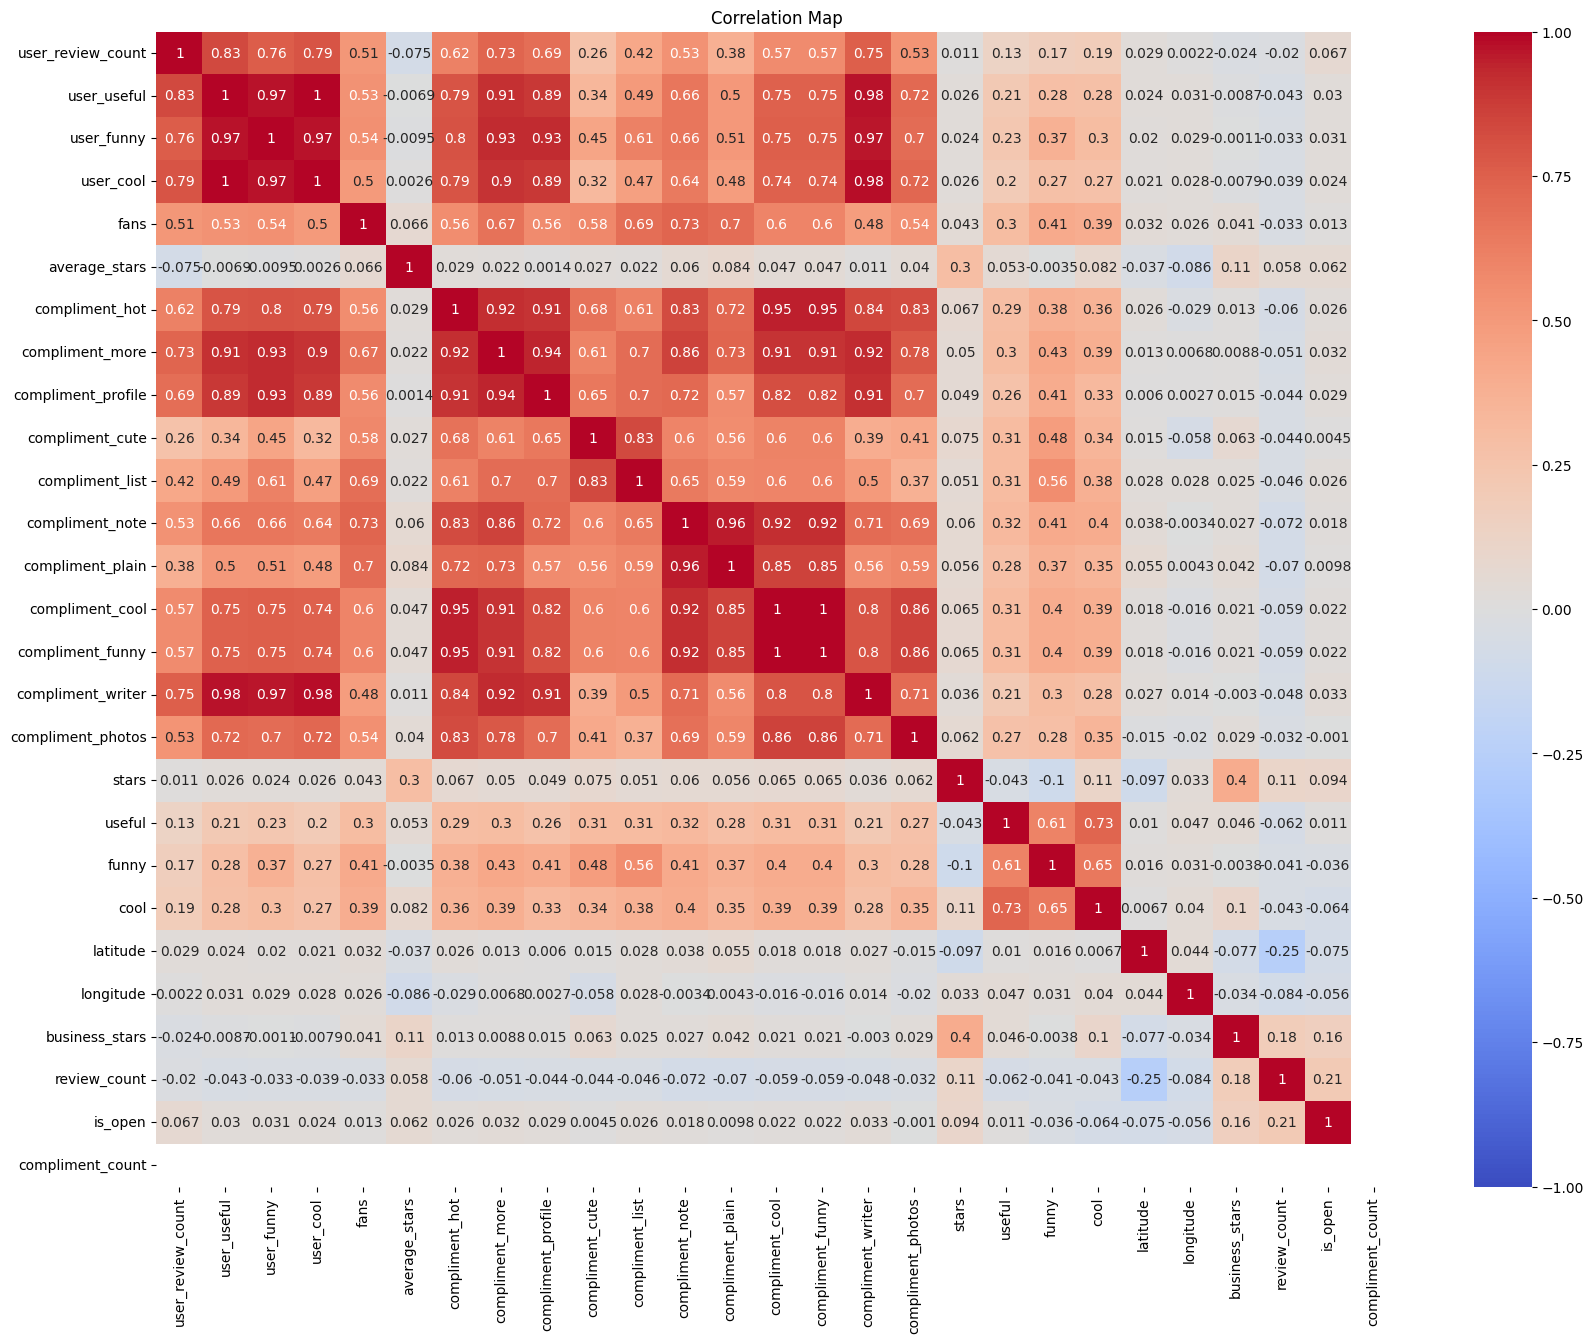

In [ ]:
numeric_data = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_data.corr()
# Plot the heatmap
plt.figure(figsize=(20, 15))  # Set the size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Map')
plt.show()


is_open shows weak correlation with other variables

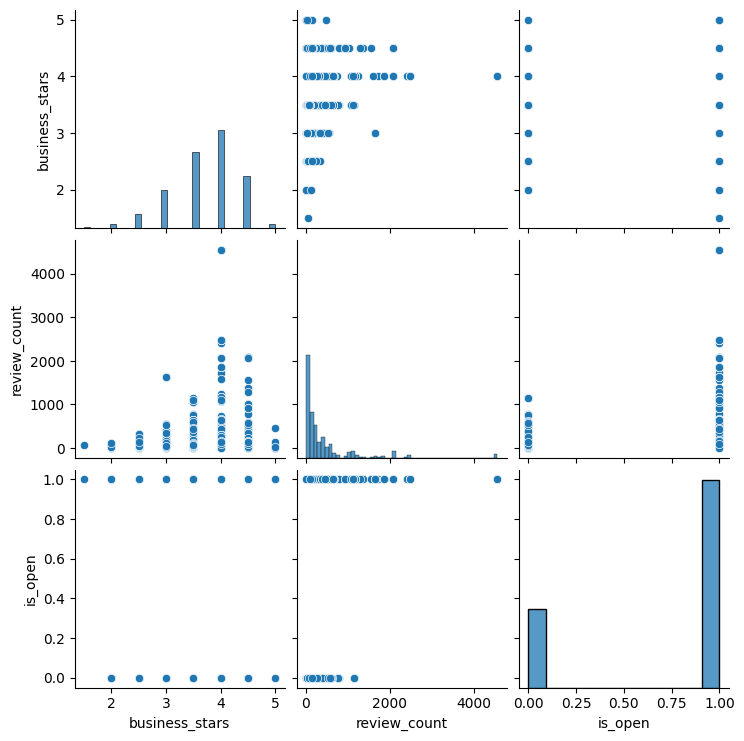

In [ ]:
# Pairplot to visualize relationships between variables like 'stars', 'review_count'
sns.pairplot(df[['business_stars', 'review_count', 'is_open']])
plt.show()

Latitude and longitude have very low correlations with other variables, including the target feature (likely is_open or some other binary indicator). These features might not contribute significantly to predicting whether a business is validated.

city and state can be one-hot encoded or grouped into regions to preserve some regional information. Address and postal code can be dropped.

In [27]:
X_train = X_train.drop(columns=['address', 'postal_code'])

In [28]:
X_test = X_test.drop(columns=['address', 'postal_code'])

In [29]:
# Define a dictionary to map each state to a region
state_to_region = {
    'AZ': 'West', 'CA': 'West', 'CO': 'West', 'NV': 'West', 'ID': 'West',
    'IL': 'Midwest', 'IN': 'Midwest', 'MO': 'Midwest',
    'FL': 'South', 'NC': 'South', 'TN': 'South', 'LA': 'South',
    'DE': 'Northeast', 'PA': 'Northeast', 'NJ': 'Northeast'
}

In [30]:
X_train['region'] = ''

# Iterate through the one-hot encoded state columns and assign regions
for state_col in X_train.columns:
    if state_col.startswith('state_'):
        state_abbr = state_col.split('_')[1]  # Extract the state abbreviation
        region = state_to_region.get(state_abbr, None)  # Map state to region
        if region:
            X_train.loc[X_train[state_col] == 1, 'region'] = region

# Drop the one-hot encoded state columns after combining
X_train = X_train.drop([col for col in X_train.columns if col.startswith('state_')], axis=1)

# One-hot encode the new region column if needed
X_train = pd.get_dummies(X_train, columns=['region'], prefix='region')

In [31]:
X_test['region'] = ''

# Iterate through the one-hot encoded state columns and assign regions
for state_col in X_test.columns:
    if state_col.startswith('state_'):
        state_abbr = state_col.split('_')[1]  # Extract the state abbreviation
        region = state_to_region.get(state_abbr, None)  # Map state to region
        if region:
            X_test.loc[X_test[state_col] == 1, 'region'] = region

# Drop the one-hot encoded state columns after combining
X_test = X_test.drop([col for col in X_test.columns if col.startswith('state_')], axis=1)

# One-hot encode the new region column if needed
X_test = pd.get_dummies(X_test, columns=['region'], prefix='region')

In [32]:
# One-hot encoding the 'state' column
X_train = pd.get_dummies(X_train, columns=['state'], drop_first=True)

In [33]:
X_test= pd.get_dummies(X_test, columns=['state'], drop_first=True)

In [ ]:
X_train.columns

Index(['user_id', 'user_name', 'user_review_count', 'yelping_since',
       'user_useful', 'user_funny', 'user_cool', 'elite', 'friends', 'fans',
       'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos',
       'review_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text',
       'date', 'name', 'city', 'business_stars', 'review_count', 'attributes',
       'categories', 'hours', 'checkin_date', 'tip_text', 'tip_date',
       'compliment_count', 'region_', 'state_AZ', 'state_CA', 'state_DE',
       'state_FL', 'state_ID', 'state_IL', 'state_IN', 'state_LA', 'state_MO',
       'state_NJ', 'state_NV', 'state_PA', 'state_TN'],
      dtype='object')

In [34]:
X_train = X_train.drop(columns=['region_'])

In [35]:
X_test = X_test.drop(columns=['region_'])

In [36]:
import json

# Function to safely parse the JSON, even if it has formatting issues
def parse_json_safe(text):
    try:
        # Replace single quotes with double quotes for JSON compatibility
        text = text.replace("'", '"')
        # Attempt to load the JSON
        return json.loads(text)
    except (json.JSONDecodeError, TypeError):
        # If parsing fails, return an empty dictionary
        return {}

# Apply the function to the 'attributes' column
X_train['attributes'] = X_train['attributes'].apply(lambda x: parse_json_safe(x) if isinstance(x, str) else {})

In [37]:
X_test['attributes'] = X_test['attributes'].apply(lambda x: parse_json_safe(x) if isinstance(x, str) else {})

In [38]:
attributes_df_train = X_train['attributes'].apply(pd.Series)
attributes_df_test = X_test['attributes'].apply(pd.Series)

In [39]:
# Convert binary features (True/False or Yes/No) to 0 and 1
attributes_df_train = attributes_df_train.replace({'True': 1, 'False': 0, 'Yes': 1, 'No': 0})

attributes_df_test = attributes_df_test.replace({'True': 1, 'False': 0, 'Yes': 1, 'No': 0})


In [40]:
attributes_df_train= attributes_df_train.fillna(0)
attributes_df_test=attributes_df_test.fillna(0)

In [41]:

# Concatenate processed attributes back into the original dataframe
X_train= pd.concat([X_train, attributes_df_train], axis=1)
X_test= pd.concat([X_test, attributes_df_test], axis=1)

# Drop the original 'attributes' column
X_train = X_train.drop('attributes', axis=1)
X_test = X_test.drop('attributes', axis=1)


In [ ]:
X_train.columns

Index(['user_id', 'user_name', 'user_review_count', 'yelping_since',
       'user_useful', 'user_funny', 'user_cool', 'elite', 'friends', 'fans',
       'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos',
       'review_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text',
       'date', 'name', 'city', 'business_stars', 'review_count', 'categories',
       'hours', 'checkin_date', 'tip_text', 'tip_date', 'compliment_count',
       'state_AZ', 'state_CA', 'state_DE', 'state_FL', 'state_ID', 'state_IL',
       'state_IN', 'state_LA', 'state_MO', 'state_NJ', 'state_NV', 'state_PA',
       'state_TN', 'ByAppointmentOnly', 'BusinessAcceptsCreditCards',
       'RestaurantsPriceRange2', 'BusinessParking', 'BikeParking',
       'AcceptsInsurance', 'GoodForKids', 'BusinessAcceptsBitco

In [42]:
def calculate_total_hours(hours_dict):
    total_hours = 0
    for day, hours in hours_dict.items():
        if hours != '0:0-0:0':  # Businesses closed on this day
            open_time, close_time = hours.split('-')
            total_hours += (int(close_time.split(':')[0]) - int(open_time.split(':')[0]))
    return total_hours

X_train ['total_hours'] =X_train ['hours'].apply(lambda x: calculate_total_hours(eval(x)) if isinstance(x, str) else 0)
X_test ['total_hours'] =X_test ['hours'].apply(lambda x: calculate_total_hours(eval(x)) if isinstance(x, str) else 0)

In [43]:
X_train = X_train.drop(columns=['hours'])
X_test = X_test.drop(columns=['hours'])

In [44]:
X_train = X_train.drop(columns=['user_name','user_id','friends','review_id', 'business_id','name'])
X_test = X_test.drop(columns=['user_name','user_id','friends','review_id', 'business_id','name'])

In [ ]:
X_train.columns

Index(['user_review_count', 'yelping_since', 'user_useful', 'user_funny',
       'user_cool', 'elite', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos', 'stars', 'useful', 'funny', 'cool', 'text', 'date',
       'city', 'business_stars', 'review_count', 'categories', 'checkin_date',
       'tip_text', 'tip_date', 'compliment_count', 'state_AZ', 'state_CA',
       'state_DE', 'state_FL', 'state_ID', 'state_IL', 'state_IN', 'state_LA',
       'state_MO', 'state_NJ', 'state_NV', 'state_PA', 'state_TN',
       'ByAppointmentOnly', 'BusinessAcceptsCreditCards',
       'RestaurantsPriceRange2', 'BusinessParking', 'BikeParking',
       'AcceptsInsurance', 'GoodForKids', 'BusinessAcceptsBitcoin',
       'total_hours'],
      dtype='object')

Frequency Encoding for category columns

In [45]:
category_frequency = X_train['categories'].value_counts()
X_train['categories_encoded'] = X_train['categories'].map(category_frequency)
print(X_train[['categories', 'categories_encoded']].head())

category_frequency = X_test['categories'].value_counts()
X_test['categories_encoded'] = X_test['categories'].map(category_frequency)
print(X_test[['categories', 'categories_encoded']].head())

                                            categories  categories_encoded
109  Vegetarian, Indian, Restaurants, Vegan, Fast Food                   1
271  Restaurants, Food, Breakfast & Brunch, Sandwic...                   2
309  Bars, Breakfast & Brunch, Restaurants, Barbequ...                   4
445                            Vietnamese, Restaurants                   3
132                Restaurants, American (Traditional)                   3
                                            categories  categories_encoded
499                               Restaurants, Italian                   3
587  Malaysian, Asian Fusion, Cambodian, Chinese, R...                   2
195                    Restaurants, Fast Food, Burgers                   1
165                               Mexican, Restaurants                   1
543  International, Hotels & Travel, Hotels, Restau...                   1


In [46]:
X_train =X_train.drop('categories', axis=1)
X_test =X_test.drop('categories', axis=1)

Adding sentiment score for long texts in review text and tips text

In [47]:
X_train['sentiment'] = X_train['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [48]:
X_test['sentiment'] = X_test['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [49]:
X_train['sentiment_tip'] = X_train['tip_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [50]:
X_test['sentiment_tip'] = X_test['tip_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [51]:
X_train = X_train.drop(columns=['text','tip_text'])
X_test = X_test.drop(columns=['text','tip_text'])

In [52]:
open_reviews = final_df_with_tips[final_df_with_tips['is_open'] == 1]
closed_reviews = final_df_with_tips[final_df_with_tips['is_open'] == 0]

In [53]:
open_summary = open_reviews.describe()
closed_summary = closed_reviews.describe()

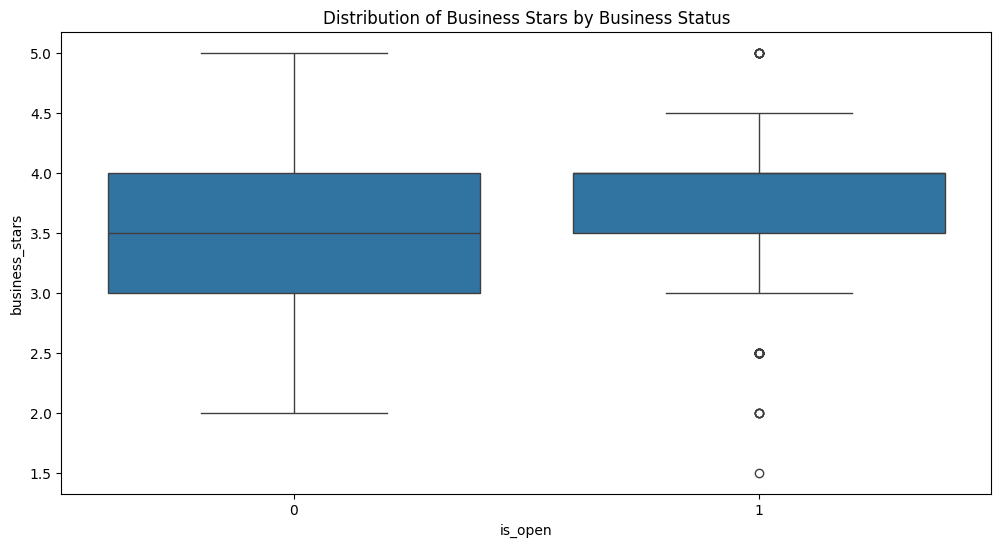

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_open', y='business_stars', data=final_df_with_tips)
plt.title('Distribution of Business Stars by Business Status')
plt.show()

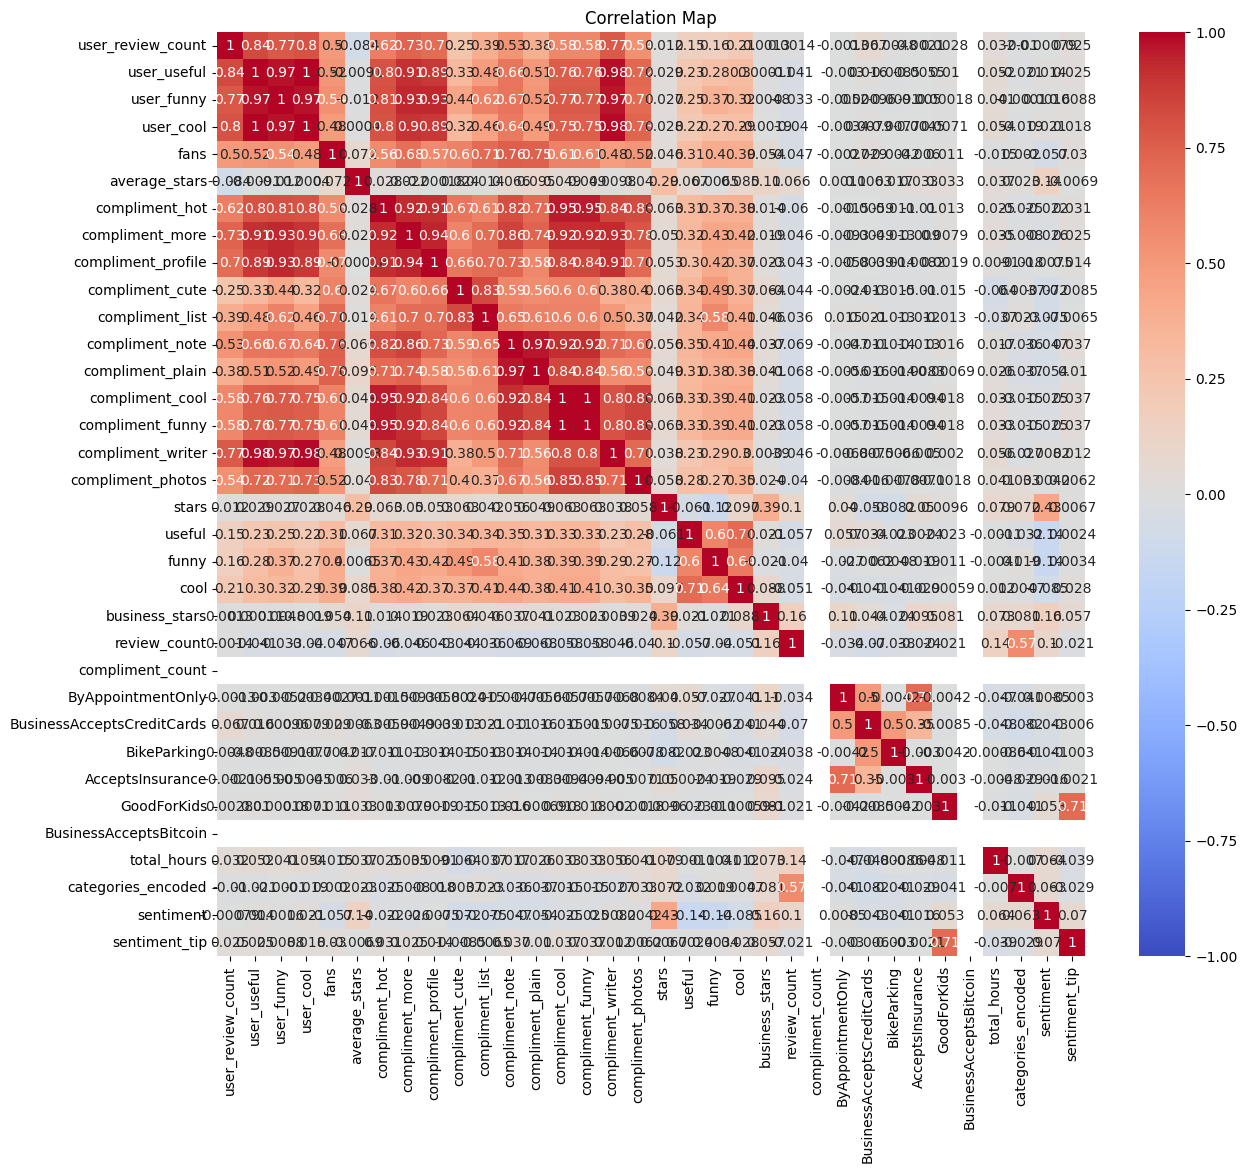

KeyError: 'is_open'

In [55]:
numeric_data = X_train.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_data.corr()
# Plot the heatmap
plt.figure(figsize=(14, 12))  # Set the size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Map')
plt.show()
# Find the correlation of 'is_open' with other columns
correlation_with_is_open = numeric_data.corr()['is_open'].sort_values(ascending=False)
print(correlation_with_is_open)


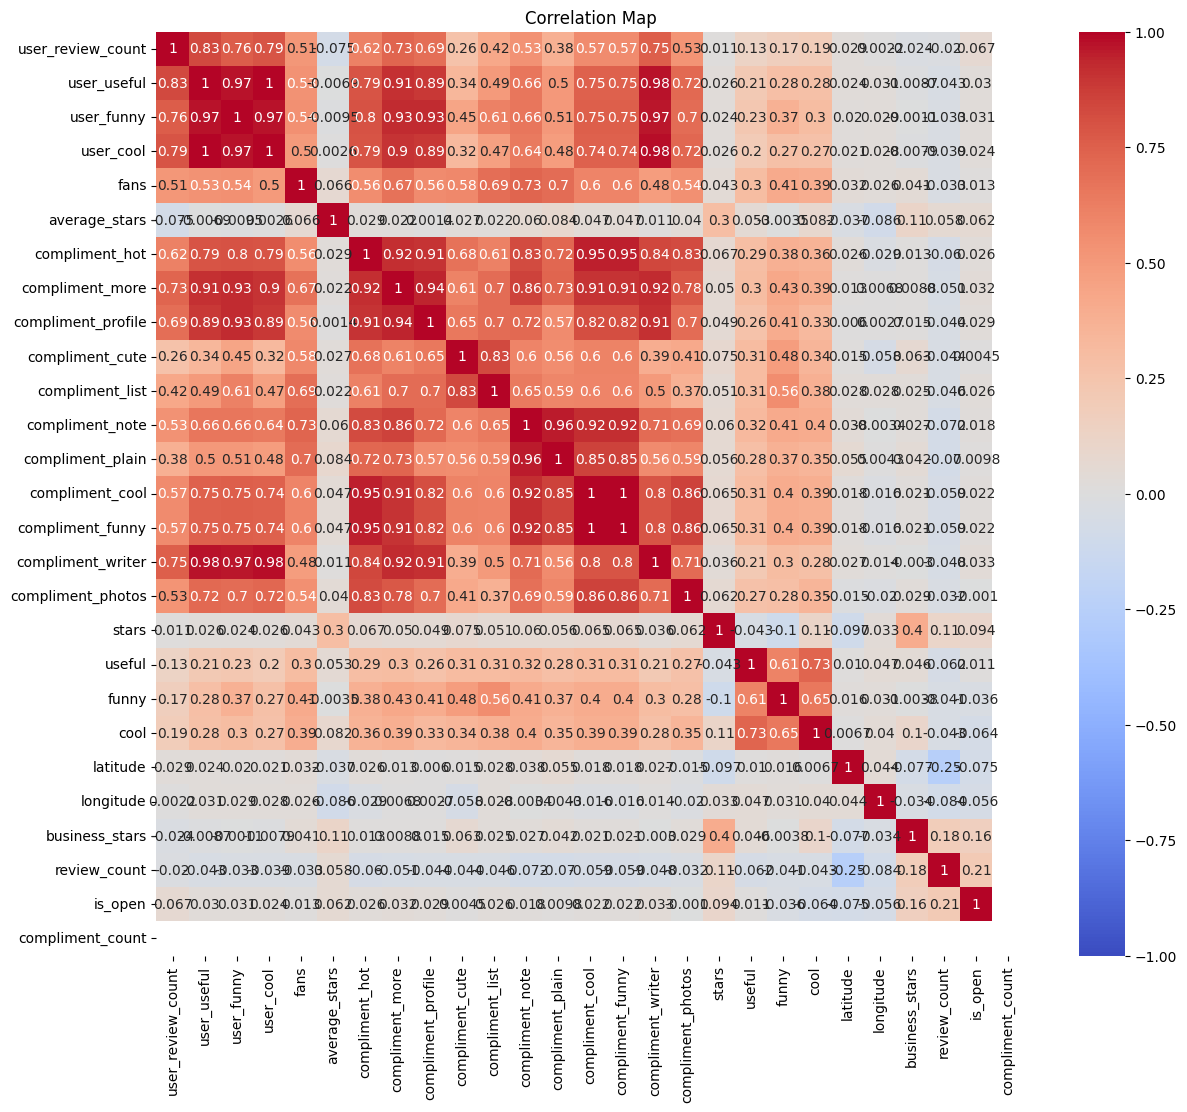

is_open               1.000000
review_count          0.206632
business_stars        0.160883
stars                 0.094375
user_review_count     0.066937
average_stars         0.062326
compliment_writer     0.032751
compliment_more       0.031601
user_funny            0.030913
user_useful           0.030181
compliment_profile    0.028603
compliment_list       0.026261
compliment_hot        0.025649
user_cool             0.024470
compliment_cool       0.021941
compliment_funny      0.021941
compliment_note       0.018121
fans                  0.012994
useful                0.010525
compliment_plain      0.009815
compliment_cute       0.004545
compliment_photos    -0.001019
funny                -0.036033
longitude            -0.055759
cool                 -0.063503
latitude             -0.075215
compliment_count           NaN
Name: is_open, dtype: float64


In [ ]:
numeric_data = final_df_with_tips.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_data.corr()
# Plot the heatmap
plt.figure(figsize=(14, 12))  # Set the size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Map')
plt.show()
# Find the correlation of 'is_open' with other columns
correlation_with_is_open = numeric_data.corr()['is_open'].sort_values(ascending=False)
print(correlation_with_is_open)



In [56]:
X_train = X_train.drop(columns=['compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer'])

X_test = X_test.drop(columns=['compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer'])

In [ ]:
X_train.head()

,user_review_count,user_useful,user_funny,user_cool,fans,average_stars,compliment_photos,stars,useful,funny,...,state_FL_True,state_ID_True,state_IL_True,state_IN_True,state_LA_True,state_MO_True,state_NJ_True,state_NV_True,state_PA_True,state_TN_True
109,-0.416071,-0.207548,164,90,-0.313908,0.682640,0,3,0,6,...,0,0,0,0,0,0,0,0,0,0
271,0.326562,0.323856,2877,3032,1.175261,0.738138,81,4,2,0,...,0,0,0,0,0,0,0,0,0,0
309,-0.368250,-0.220497,11,35,-0.308808,0.654891,1,5,1,0,...,0,0,0,0,1,0,0,0,0,0
445,-0.121643,-0.198380,63,118,-0.247609,-1.121052,1,2,0,0,...,0,0,0,0,0,0,0,0,1,0
132,0.131527,0.082621,1247,1971,0.175682,0.349650,33,3,4,3,...,0,0,0,0,0,0,0,0,0,0


In [57]:
X_train['yelping_since'] = pd.to_datetime(X_train['yelping_since'])
X_train['yelping_since_year'] =X_train['yelping_since'].dt.year
X_train['yelping_since_duration'] = (pd.Timestamp.now() - X_train['yelping_since']).dt.days / 365

In [58]:
X_test['yelping_since'] = pd.to_datetime(X_test['yelping_since'])
X_test['yelping_since_year'] =X_test['yelping_since'].dt.year
X_test['yelping_since_duration'] = (pd.Timestamp.now() - X_test['yelping_since']).dt.days / 365

In [59]:
X_train['elite_count'] = X_train['elite'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)
X_train['is_elite'] = X_train['elite_count'].apply(lambda x: 1 if x > 0 else 0)


In [60]:
X_test['elite_count'] = X_test['elite'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)
X_test['is_elite'] = X_test['elite_count'].apply(lambda x: 1 if x > 0 else 0)

In [61]:
X_train = X_train.drop(columns=['yelping_since','elite'])
X_test= X_test.drop(columns=['yelping_since','elite'])

In [ ]:
numeric_data =X_train.select_dtypes(include=[np.number])
print(numeric_data )

     user_review_count  user_useful  user_funny  user_cool  fans  \
109                 73          181         164         90     2   
271                865         4818        2877       3032   294   
309                124           68          11         35     3   
445                387          261          63        118    15   
132                657         2713        1247       1971    98   
..                 ...          ...         ...        ...   ...   
71                  24           36           2          3     0   
106                218          419          94        188    15   
270                154          268          44        127    12   
435                314          721         126        226    27   
102                138          386         141        187     7   

     average_stars  compliment_photos  stars  useful  funny  ...  GoodForKids  \
109           4.05                  0      3       0      6  ...          0.0   
271           4.07   

In [62]:
columns_to_scale = ['user_review_count', 'user_useful', 'fans', 'average_stars', 'total_hours', 'sentiment', 'sentiment_tip']
scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [ ]:
missing_values = X_train.isnull().sum()
print(missing_values)

user_review_count             0
yelping_since                 0
user_useful                   0
user_funny                    0
user_cool                     0
elite                         0
fans                          0
average_stars                 0
compliment_photos             0
stars                         0
useful                        0
funny                         0
cool                          0
date                          0
city                          0
business_stars                0
review_count                  0
checkin_date                  0
tip_date                      0
compliment_count              0
state_AZ                      0
state_CA                      0
state_DE                      0
state_FL                      0
state_ID                      0
state_IL                      0
state_IN                      0
state_LA                      0
state_MO                      0
state_NJ                      0
state_NV                      0
state_PA

In [ ]:
X_train.head()

,user_review_count,user_useful,user_funny,user_cool,fans,average_stars,compliment_photos,stars,useful,funny,...,GoodForKids,BusinessAcceptsBitcoin,total_hours,categories_encoded,sentiment,sentiment_tip,yelping_since_year,yelping_since_duration,elite_count,is_elite
109,-0.416071,-0.207548,164,90,-0.313908,0.682640,0,3,0,6,...,0.0,0.0,0.722207,1,-0.655892,-0.046029,2010,13.868493,1,1
271,0.326562,0.323856,2877,3032,1.175261,0.738138,81,4,2,0,...,0.0,0.0,-0.013216,2,-0.409191,-0.046029,2010,14.301370,7,1
309,-0.368250,-0.220497,11,35,-0.308808,0.654891,1,5,1,0,...,0.0,0.0,0.193622,4,0.264172,-0.046029,2009,15.147945,2,1
445,-0.121643,-0.198380,63,118,-0.247609,-1.121052,1,2,0,0,...,0.0,0.0,0.561333,3,-1.251311,-0.046029,2009,15.594521,3,1
132,0.131527,0.082621,1247,1971,0.175682,0.349650,33,3,4,3,...,0.0,0.0,-0.082162,3,0.132349,-0.046029,2010,14.484932,11,1


In [ ]:
X_train.dtypes

,0
user_review_count,float64
user_useful,float64
user_funny,int64
user_cool,int64
fans,float64
average_stars,float64
compliment_photos,int64
stars,int64
useful,int64
funny,int64


In [63]:
# Convert date columns to datetime
X_train['date'] = pd.to_datetime(X_train['date'], errors='coerce')
X_train['checkin_date'] = pd.to_datetime(X_train['checkin_date'], errors='coerce')
X_train['tip_date'] = pd.to_datetime(X_train['tip_date'], errors='coerce')

# Convert dates to numeric (number of days since 1970-01-01)
X_train['date_numeric'] = (X_train['date'] - pd.Timestamp('1970-01-01')).dt.days
X_train['checkin_date_numeric'] = (X_train['checkin_date'] - pd.Timestamp('1970-01-01')).dt.days
X_train['tip_date_numeric'] = (X_train['tip_date'] - pd.Timestamp('1970-01-01')).dt.days

# Drop original date columns
X_train.drop(['date', 'checkin_date', 'tip_date'], axis=1, inplace=True)


<ipython-input-63-61f30d7e2b8e>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_train['checkin_date'] = pd.to_datetime(X_train['checkin_date'], errors='coerce')


In [64]:
# Convert date columns to datetime
X_test['date'] = pd.to_datetime(X_test['date'], errors='coerce')
X_test['checkin_date'] = pd.to_datetime(X_test['checkin_date'], errors='coerce')
X_test['tip_date'] = pd.to_datetime(X_test['tip_date'], errors='coerce')

# Convert dates to numeric (number of days since 1970-01-01)
X_test['date_numeric'] = (X_test['date'] - pd.Timestamp('1970-01-01')).dt.days
X_test['checkin_date_numeric'] = (X_test['checkin_date'] - pd.Timestamp('1970-01-01')).dt.days
X_test['tip_date_numeric'] = (X_test['tip_date'] - pd.Timestamp('1970-01-01')).dt.days

# Drop original date columns
X_test.drop(['date', 'checkin_date', 'tip_date'], axis=1, inplace=True)

<ipython-input-64-47c45a0e92df>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_test['checkin_date'] = pd.to_datetime(X_test['checkin_date'], errors='coerce')


In [65]:
# One-hot encoding for city
X_train= pd.get_dummies(X_train, columns=['city'], drop_first=True)



In [66]:
X_test= pd.get_dummies(X_test, columns=['city'], drop_first=True)


In [67]:
non_numeric_columns =X_train.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index(['state_AZ', 'state_CA', 'state_DE', 'state_FL', 'state_ID', 'state_IL',
       'state_IN', 'state_LA', 'state_MO', 'state_NJ', 'state_NV', 'state_PA',
       'state_TN', 'RestaurantsPriceRange2', 'BusinessParking', 'city_Ardmore',
       'city_Ballwin', 'city_Belleair', 'city_Bensalem', 'city_Blue Bell',
       'city_Boise', 'city_Brandon', 'city_Brentwood', 'city_Brownsburg',
       'city_Bryn Mawr', 'city_Carmel', 'city_Cherry Hill',
       'city_Chesterfield', 'city_Clearwater', 'city_Clearwater Beach',
       'city_Columbia', 'city_Conshohocken', 'city_Des Peres',
       'city_Downingtown', 'city_Dunedin', 'city_Eddystone', 'city_Edmonton',
       'city_Fairview Heights', 'city_Fishers', 'city_Franklin', 'city_Goleta',
       'city_Harahan', 'city_Indianapolis', 'city_Isla Vista',
       'city_King of Prussia', 'city_Kingston Springs', 'city_Limerick',
       'city_Lutz', 'city_Madeira Beach', 'city_Media', 'city_Metairie',
       'city_Montecito', 'city_Mooresville', 'city_

In [ ]:
print(X_train.columns)


Index(['user_review_count', 'user_useful', 'user_funny', 'user_cool', 'fans',
       'average_stars', 'compliment_photos', 'stars', 'useful', 'funny',
       ...
       'city_Tampa_True', 'city_Tarpon Springs_True', 'city_Tucson_True',
       'city_University City_True', 'city_Valley Park_True', 'city_Wayne_True',
       'city_Wesley Chapel_True', 'city_West Berlin_True',
       'city_Willow Grove_True', 'city_Wilmington_True'],
      dtype='object', length=125)


In [68]:
city_columns = [col for col in X_train.columns if col.startswith('city_')]
X_train = X_train.drop(columns=city_columns)
print(X_train.columns)


Index(['user_review_count', 'user_useful', 'user_funny', 'user_cool', 'fans',
       'average_stars', 'compliment_photos', 'stars', 'useful', 'funny',
       'cool', 'business_stars', 'review_count', 'compliment_count',
       'state_AZ', 'state_CA', 'state_DE', 'state_FL', 'state_ID', 'state_IL',
       'state_IN', 'state_LA', 'state_MO', 'state_NJ', 'state_NV', 'state_PA',
       'state_TN', 'ByAppointmentOnly', 'BusinessAcceptsCreditCards',
       'RestaurantsPriceRange2', 'BusinessParking', 'BikeParking',
       'AcceptsInsurance', 'GoodForKids', 'BusinessAcceptsBitcoin',
       'total_hours', 'categories_encoded', 'sentiment', 'sentiment_tip',
       'yelping_since_year', 'yelping_since_duration', 'elite_count',
       'is_elite', 'date_numeric', 'checkin_date_numeric', 'tip_date_numeric'],
      dtype='object')


In [69]:
city_columns = [col for col in X_test.columns if col.startswith('city_')]
X_test = X_test.drop(columns=city_columns)
print(X_test.columns)


Index(['user_review_count', 'user_useful', 'user_funny', 'user_cool', 'fans',
       'average_stars', 'compliment_photos', 'stars', 'useful', 'funny',
       'cool', 'business_stars', 'review_count', 'compliment_count',
       'state_AZ', 'state_CA', 'state_DE', 'state_FL', 'state_ID', 'state_IN',
       'state_LA', 'state_MO', 'state_NJ', 'state_NV', 'state_PA', 'state_TN',
       'BusinessAcceptsCreditCards', 'ByAppointmentOnly', 'AcceptsInsurance',
       'GoodForKids', 'BusinessAcceptsBitcoin', 'RestaurantsPriceRange2',
       'BikeParking', 'total_hours', 'categories_encoded', 'sentiment',
       'sentiment_tip', 'yelping_since_year', 'yelping_since_duration',
       'elite_count', 'is_elite', 'date_numeric', 'checkin_date_numeric',
       'tip_date_numeric'],
      dtype='object')


In [84]:
non_numeric_columns =X_test.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index(['RestaurantsPriceRange2'], dtype='object')


In [104]:
print(X_train.dtypes)

user_review_count             float64
user_useful                   float64
user_funny                      int64
user_cool                       int64
fans                          float64
average_stars                 float64
compliment_photos               int64
stars                           int64
useful                          int64
funny                           int64
cool                            int64
business_stars                float64
review_count                    int64
compliment_count              float64
state_AZ                        int64
state_CA                        int64
state_DE                        int64
state_FL                        int64
state_ID                        int64
state_IN                        int64
state_LA                        int64
state_MO                        int64
state_NJ                        int64
state_NV                        int64
state_PA                        int64
state_TN                        int64
ByAppointmen

In [103]:
print(X_train.isnull().sum())


user_review_count             0
user_useful                   0
user_funny                    0
user_cool                     0
fans                          0
average_stars                 0
compliment_photos             0
stars                         0
useful                        0
funny                         0
cool                          0
business_stars                0
review_count                  0
compliment_count              0
state_AZ                      0
state_CA                      0
state_DE                      0
state_FL                      0
state_ID                      0
state_IN                      0
state_LA                      0
state_MO                      0
state_NJ                      0
state_NV                      0
state_PA                      0
state_TN                      0
ByAppointmentOnly             0
BusinessAcceptsCreditCards    0
BikeParking                   0
AcceptsInsurance              0
GoodForKids                   0
Business

In [75]:
X_train['checkin_date_numeric'].fillna(0, inplace=True)

In [76]:
X_test['checkin_date_numeric'].fillna(0, inplace=True)

In [86]:
boolean_columns = ['state_AZ', 'state_CA', 'state_DE', 'state_FL', 'state_ID', 'state_IN',
                   'state_LA', 'state_MO', 'state_NJ', 'state_NV', 'state_PA', 'state_TN',]
X_train[boolean_columns] = X_train[boolean_columns].astype(int)
X_test[boolean_columns] = X_test[boolean_columns].astype(int)

In [100]:
print(X_test.isnull().sum())


user_review_count             0
user_useful                   0
user_funny                    0
user_cool                     0
fans                          0
average_stars                 0
compliment_photos             0
stars                         0
useful                        0
funny                         0
cool                          0
business_stars                0
review_count                  0
compliment_count              0
state_AZ                      0
state_CA                      0
state_DE                      0
state_FL                      0
state_ID                      0
state_IN                      0
state_LA                      0
state_MO                      0
state_NJ                      0
state_NV                      0
state_PA                      0
state_TN                      0
BusinessAcceptsCreditCards    0
ByAppointmentOnly             0
AcceptsInsurance              0
GoodForKids                   0
BusinessAcceptsBitcoin        0
BikePark

In [97]:
X_train['tip_date_numeric'].fillna(0, inplace=True)

In [98]:
X_test['tip_date_numeric'].fillna(0, inplace=True)

In [ ]:
#from sklearn.decomposition import PCA

# Apply PCA to retain 95% of the variance
#pca = PCA(n_components=0.95)
#X_train_pca = pca.fit_transform(X_train)


In [105]:
# Check if the column names are the same and in the same order
print(X_train.columns == X_test.columns)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False  True  True  True  True
  True  True  True  True  True  True  True]


In [106]:
# Reorder X_test columns to match X_train
X_test = X_test[X_train.columns]


In [107]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [108]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix to understand the number of correct/incorrect predictions
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Detailed classification report with precision, recall, and F1-score
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")


Accuracy: 0.7479
Confusion Matrix:
[[ 7 25]
 [ 5 82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.22      0.32        32
           1       0.77      0.94      0.85        87

    accuracy                           0.75       119
   macro avg       0.67      0.58      0.58       119
weighted avg       0.72      0.75      0.70       119

